In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch as ch
import pandas as pd


In [3]:
 import glob
    
 def read_split_files(base_filepath, is_pandas=False):
     if base_filepath.endswith('.csv'):
         base_filepath = base_filepath[:-4]
     total_rows = 0
     data = []
     for f in glob.glob(base_filepath+'*.csv'):
         if is_pandas:
             data.append(pd.read_csv(f, dtype=np.float32))
         else:
             data.append(np.loadtxt(f, delimiter=',', dtype=np.float32))
     if is_pandas:
         data = pd.concat(data, axis=0)
     else:
         data = np.concatenate(data, axis=0)
     print('Parsed %d rows from %s.' % (data.shape[0], base_filepath))
     return data

In [7]:
# these are log emissivity data
S = read_split_files('../gen_data_old/sim_train_emi_spectral_0-of-1.csv')
L = read_split_files('../gen_data_old/sim_train_geom_spectral_0-of-1.csv', is_pandas=True)

Parsed 7812 rows from ../gen_data_old/sim_train_emi_spectral_0-of-1.
Parsed 7812 rows from ../gen_data_old/sim_train_geom_spectral_0-of-1.


In [8]:
GEOM_CLASSES = ["TriangPrismIsosc", "parallelepiped", "sphere", "wire"]
MAT_CLASSES = ["Au", "SiN", "SiO2"]

def get_shape(df):
    for i, name in enumerate(GEOM_CLASSES):
        if df['Geometry_' + name] == 1:
            return name, i
        
def get_material(df):
    for i, name in enumerate(MAT_CLASSES):
        if df['Material_' + name] == 1:
            return name, i

def plot(idx):
    plt.figure()
    plt.plot(np.exp(S[idx, :]))
    plt.title(get_shape(L.iloc[idx])[0] + ' ' + get_material(L.iloc[idx])[1])
    plt.show()

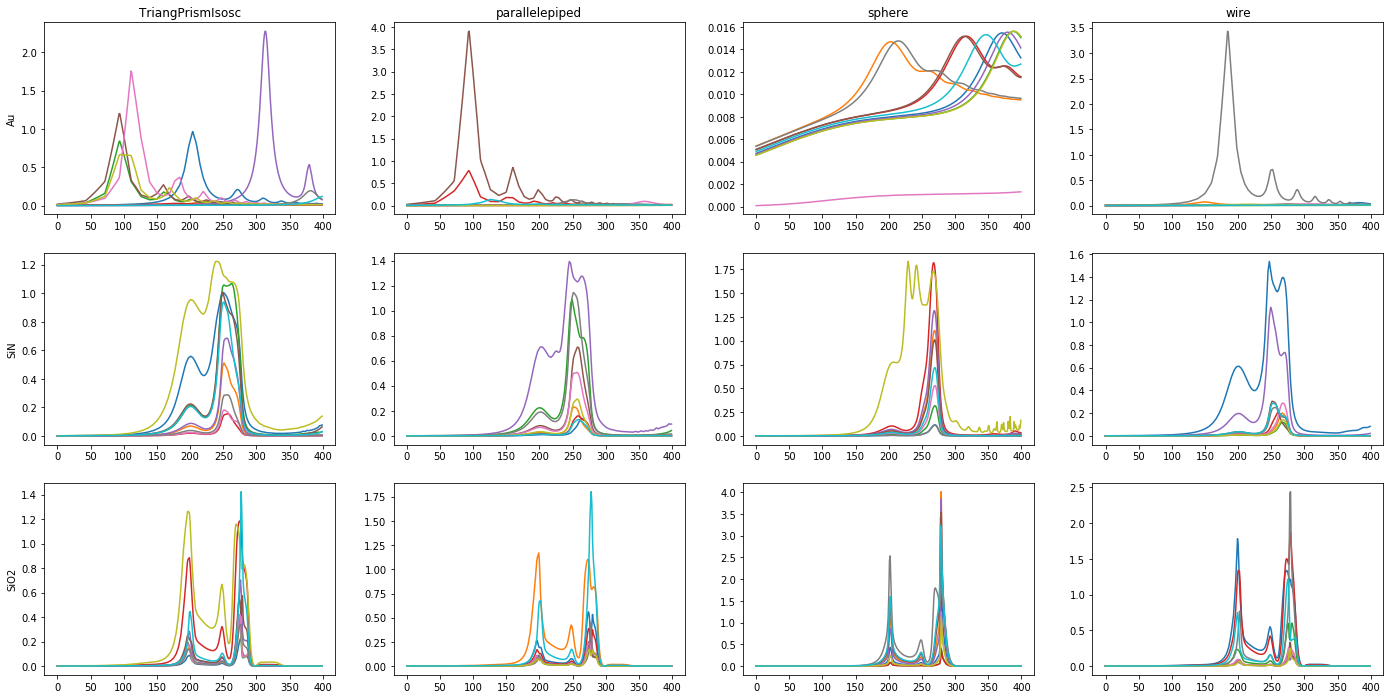

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(24, 12))

for m, name in enumerate(MAT_CLASSES):
    axes[m][0].set_ylabel(name)
for s, name in enumerate(GEOM_CLASSES):
    axes[0][s].set_title(name)

for m, mat in enumerate(MAT_CLASSES):
    for s, shape in enumerate(GEOM_CLASSES):
        cnt = 0
        for i in range(S.shape[0]):
            if get_shape(L.iloc[i])[1] == s and m == get_material(L.iloc[i])[1]:
                axes[m][s].plot(np.exp(S[i, :]))
                cnt += 1
            if cnt >= 10:
                break
    
plt.show()

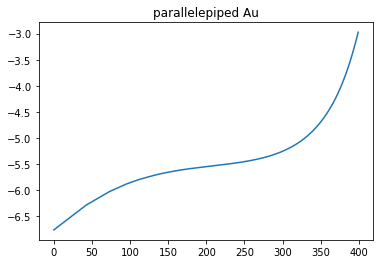

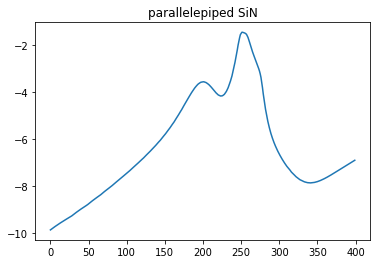

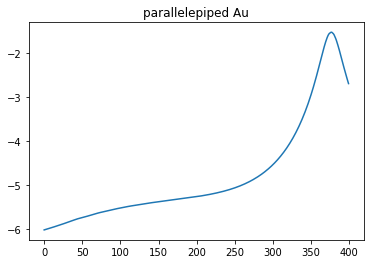

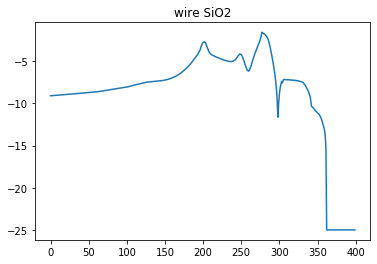

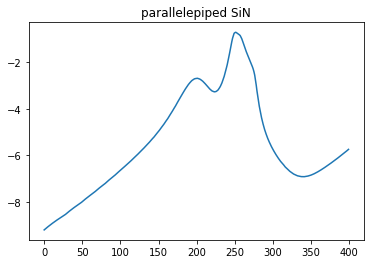

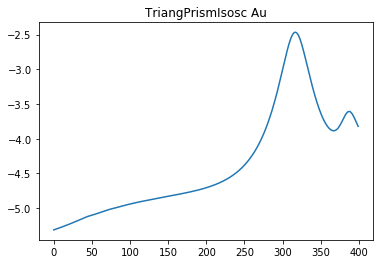

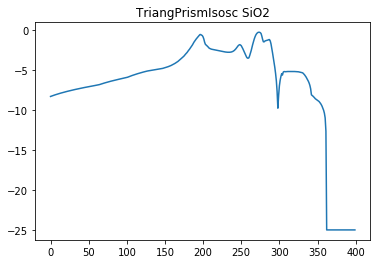

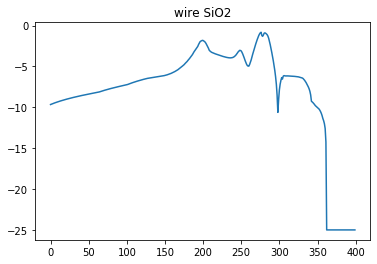

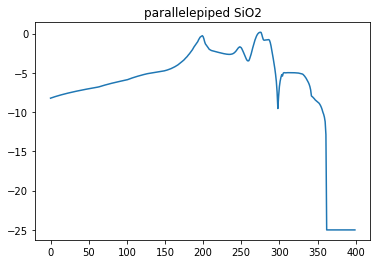

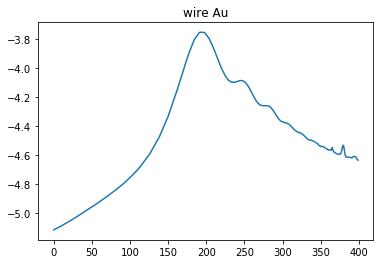

In [27]:
for i in range(10):
    plot(i)